In [3]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
from math import floor
from scipy.stats import norm
from datetime import datetime, timedelta

# Create function for simulating saving for n years

In [4]:
def save_for_n_years_df(df, start_date, end_date, dca_monthly_investment_amount, dca_investment_frequency_per_month):
    
    df = df[df['Date'] < end_date]
    df = df[df['Date'] >= start_date]
    df = df.set_index(pd.DatetimeIndex(df['Date'])).resample(f"{floor(30 / dca_investment_frequency_per_month)}D").agg('first')
    period_last_open = df.iloc[-1]['Open']
    df['added_capital'] = dca_monthly_investment_amount / dca_investment_frequency_per_month
    df['value_period_end'] = df['added_capital'] * (period_last_open / df['Open'])
    return {"start_date": df.iloc[0]['Date'], "end_date": df.iloc[-1]['Date'], "investment_frequency": floor(30 / dca_investment_frequency_per_month), "value": df['value_period_end'].sum()}

# Set simulation parameters

In [5]:
#From what date we will start run our simulations
simulation_start_date = datetime(1927, 12, 30)

#Until what date we will run our simulations
simulation_end_date = datetime(1928, 12, 31)

#What investment frequencies to test - 4/month and 1/month
investment_frequencies_per_month = [4, 2, 1]

#Read file containing S&P500 historical data
file = r'C:\Users\anton\Documents\investment_analysis\data\SPX.csv'
df = pd.read_csv(file, index_col=None, header=0)

#Date column is String, convert to Python Datetime
df['Date'] = pd.to_datetime(df['Date'])

#Results will go here
result = []

# Start simulation

In [6]:
#Loop through each investment frequency
for investment_frequency_per_month in investment_frequencies_per_month:
    
    #Set current date to our simulation start date
    simulation_current_date = simulation_start_date
    
    print(f"Testing investment frequency of {floor(30 / investment_frequency_per_month)} days")

    #Simulate starting investing
    while simulation_current_date < simulation_end_date:
    
        #Save result - Start date, end date, current frequency and value
        result.append(save_for_n_years_df(df, simulation_current_date, simulation_current_date + timedelta(days=365*25), 10000, investment_frequency_per_month))
    
        #Start simulating from 
        simulation_current_date = simulation_current_date + timedelta(days=1)
    
#Convert results to df
results_df = pd.DataFrame(result)

Testing investment frequency of 7 days
Testing investment frequency of 15 days
Testing investment frequency of 30 days


# Results
<p> These are the results after running a simulation where a person invests n SEK for y years

## Investment frequencies
<p> What is the best frequency for investing your money? Once a month? Twice a month? Or perhaps more seldom? </p>

In [7]:
#Group result by investment frequency
results_df.groupby('investment_frequency').agg({'value' : ['mean', 'min', 'max', 'median']})

value                                          
                              mean           min           max        median
investment_frequency                                                        
7                     6.191325e+06  5.667450e+06  6.683085e+06  6.157920e+06
15                    5.786248e+06  5.298005e+06  6.239944e+06  5.757065e+06
30                    5.791814e+06  5.305179e+06  6.240667e+06  5.766355e+06

### Show the best and worst investment frequencies

In [8]:
#Find the best frequency for investing
results_df.sort_values(by=['value'], inplace=True, ascending=False)
results_df.head()

,start_date,end_date,investment_frequency,value
16,1928-01-16,1953-01-05,7,6.683085e+06
17,1928-01-16,1953-01-05,7,6.683085e+06
15,1928-01-16,1953-01-05,7,6.683085e+06
11,1928-01-10,1952-12-30,7,6.665448e+06
12,1928-01-11,1952-12-31,7,6.656314e+06


In [9]:
#Find the worst frequency for investing
results_df.sort_values(by=['value'], inplace=True, ascending=False)
results_df.tail()

,start_date,end_date,investment_frequency,value
1004,1928-09-25,1953-09-14,30,5.305179e+06
636,1928-09-24,1953-09-14,15,5.299178e+06
635,1928-09-24,1953-09-14,15,5.299178e+06
634,1928-09-24,1953-09-14,15,5.299178e+06
637,1928-09-25,1953-09-14,15,5.298005e+06


### Graphs
<p>Display the data in graphs</p>

#### Histogram with 95% confidence interval for our best investment frequency
<p>The graph below plots the results in our best investment frequency scenario and shows the 95% confidence interval for it - This means that in 95% of cases you can expect to end up with this amount of money after 25 years of saving with the selected investment frequency.</p>

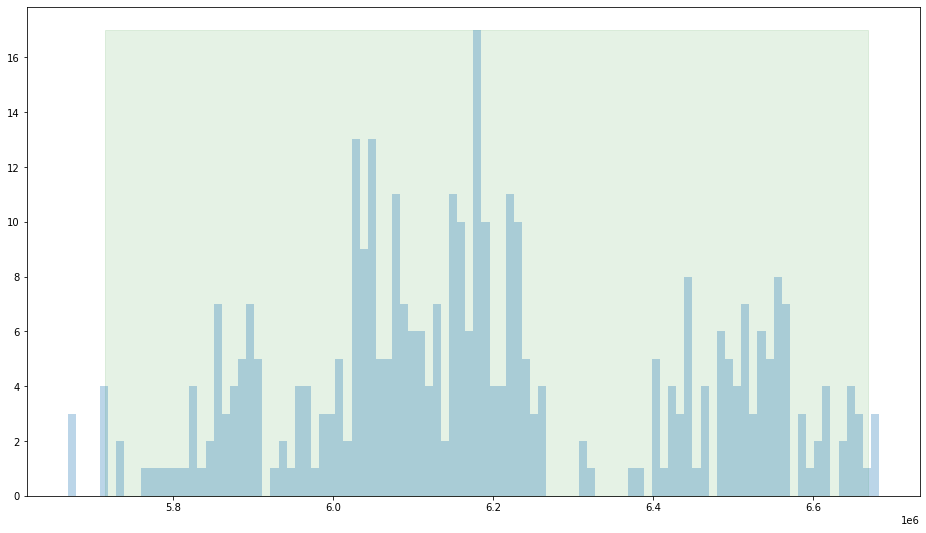

In [11]:
test_df = results_df[results_df['investment_frequency'] == 7]
arr = test_df['value']
plt.figure(figsize=(16,9))
ci = norm(*norm.fit(arr)).interval(0.95)  # fit a normal distribution and get 95% c.i.
height, bins, patches = plt.hist(arr, alpha=0.3, bins=100)
plt.fill_betweenx([0, height.max()], ci[0], ci[1], color='g', alpha=0.1)

## What 25-year period produced the best results?
<p>Which 25-year period was the best to be alive and save?</p>

In [12]:
results_df.sort_values(by=['value'], inplace=True, ascending=False)
results_df.tail()

,start_date,end_date,investment_frequency,value
1004,1928-09-25,1953-09-14,30,5.305179e+06
636,1928-09-24,1953-09-14,15,5.299178e+06
635,1928-09-24,1953-09-14,15,5.299178e+06
634,1928-09-24,1953-09-14,15,5.299178e+06
637,1928-09-25,1953-09-14,15,5.298005e+06
